In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://en.wikipedia.org/wiki/Kernel_density_estimation'

In [3]:
dataset = randn(25)

(0, 1)

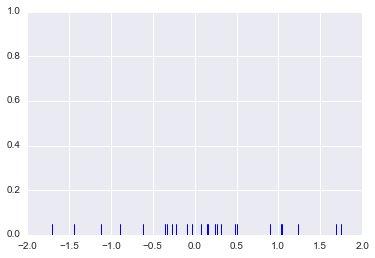

In [6]:
sns.rugplot(dataset)
plt.ylim(0,1)

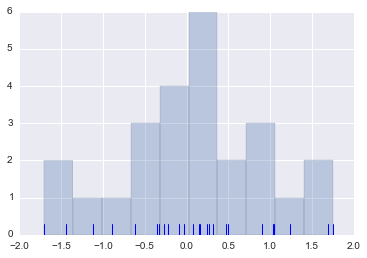

In [8]:
# count how many ticks are in each bin
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

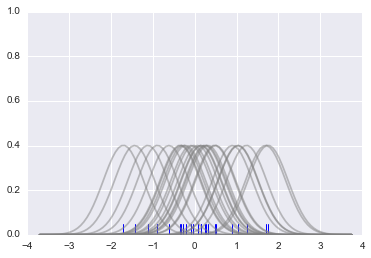

In [11]:
# kernel desity plot, uses normal distribution to represent the ticks
sns.rugplot(dataset)

x_min = dataset.min() -2
x_max = dataset.max() +2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []

for dp in dataset:
    #create kernel for each point
    kernel = stats.norm(dp,bandwidth).pdf(x_axis)
    #append it to kernel list
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

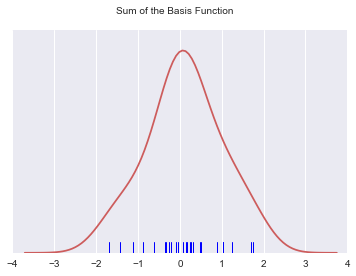

In [12]:
# to get kernel density estimate, we need to sum all th little normal distributions
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the Basis Function")

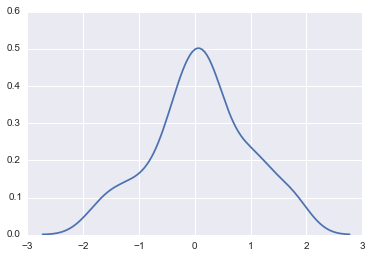

In [13]:
# now we can do this the short way
sns.kdeplot(dataset)

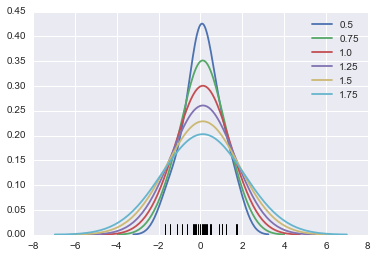

In [16]:
# we can change the sensitivity
sns.rugplot(dataset,color='black')

# does it for increments of sensitivity
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [17]:
# we can choose different types of kernels
url2 = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'

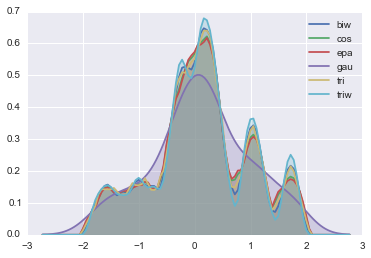

In [21]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

# show each type of kernel plots
for k in kernel_options:
    sns.kdeplot(dataset,kernel=k,label=k, shade=True)

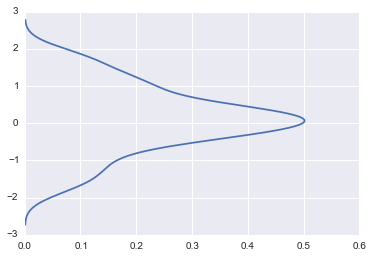

In [22]:
# to plot of the vertical axis
sns.kdeplot(dataset,vertical=True)

In [25]:
# we can also create a cumulative distribution
url3 = 'https://en.wikipedia.org/wiki/Cumulative_distribution_function'

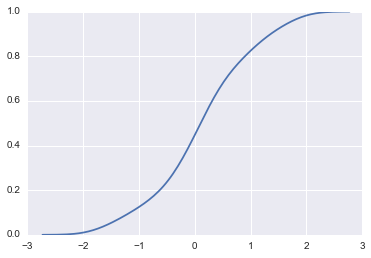

In [26]:
# plot cummulative distribution
sns.kdeplot(dataset,cumulative=True)

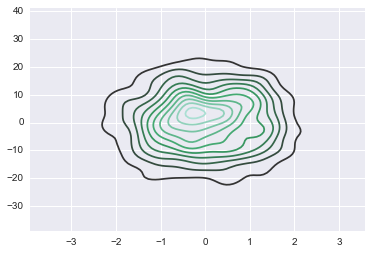

In [29]:
# for multi dimensional data
mean = [0,0]

cov = [[1,0],[0,100]]

ds2 = np.random.multivariate_normal(mean,cov,1000)

df = pd.DataFrame(ds2,columns=['X','Y'])

sns.kdeplot(df)

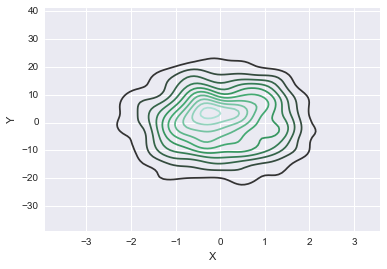

In [30]:
# same thing with specification
sns.kdeplot(df.X,df.Y)

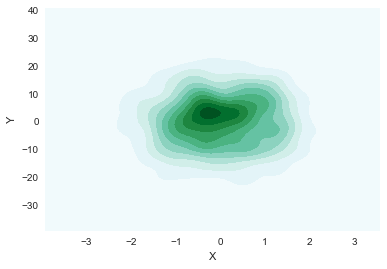

In [31]:
# with shadin
sns.kdeplot(df.X,df.Y, shade=True)

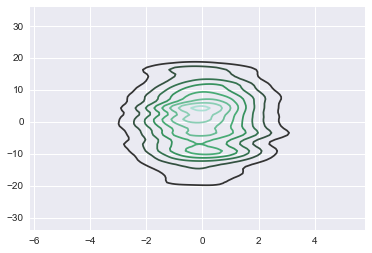

In [32]:
# use bandwidth
sns.kdeplot(df,bw=1)

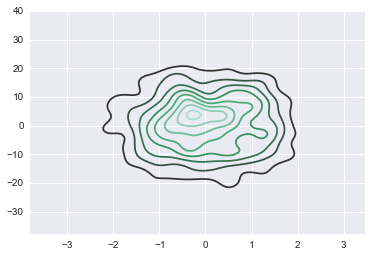

In [33]:
sns.kdeplot(df,bw='silverman')

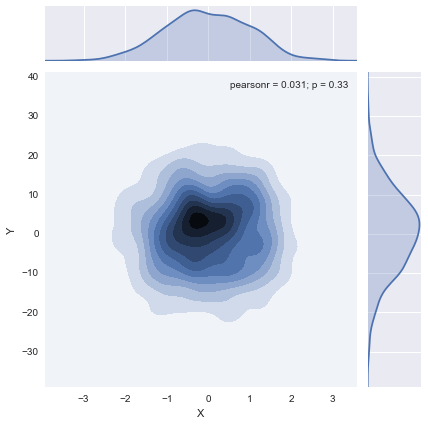

In [34]:
# we can create kde joint plot
sns.jointplot('X','Y',df,kind='kde')